Using TensorFlow backend.


(50000, 28, 28) (50000,)


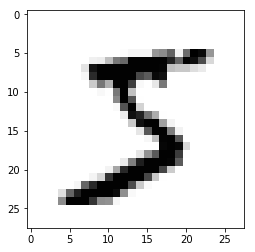

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np
#import timeit

In [3]:
# Defining parameters 

X_train_reshape = X_train.reshape((50000, 784))
X_test_reshape = X_test.reshape((10000, 784))

y_train_reshape = np.zeros((y_train.size, y_train.max()+1))
y_train_reshape[np.arange(y_train.size),y_train] = 1
y_test_reshape = np.zeros((y_test.size, y_test.max()+1))
y_test_reshape[np.arange(y_test.size),y_test] = 1

X = tf.placeholder('float32', shape=[None,784])
Y = tf.placeholder('float32', shape=[None, 10])
w1 = tf.Variable(tf.truncated_normal(shape=(784, 50), mean=0.0, stddev=0.001), dtype='float32')
w2 = tf.Variable(tf.truncated_normal(shape=(50,10), mean=0.0, stddev=0.001), dtype='float32')
b1 = tf.Variable(tf.ones(shape=(1,50)),dtype='float32')
b2 = tf.Variable(tf.ones(shape=(1,10)),dtype='float32')


In [4]:
# Building model
hidden_layer = tf.nn.relu(tf.add(tf.matmul(X,w1), b1))
y_model = tf.nn.softmax(tf.add(tf.matmul(hidden_layer,w2), b2))
loss = tf.losses.softmax_cross_entropy(Y, y_model)
accuracy = tf.metrics.accuracy(tf.argmax(Y, 1), tf.argmax(y_model, 1))
optimizer = tf.train.AdamOptimizer(learning_rate=0.009,beta1=0.8,beta2=0.99,epsilon=1e-08).minimize(loss, var_list=[w1,b1,w2,b2])

In [5]:
# Training

#start_time = timeit.default_timer()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
mini_batch_size = 100
n_batch = 500
lossdata = []
lossdata2 = []
iters = []
for i in range(50000):
    i_batch = (i % n_batch)*mini_batch_size
    sess.run(optimizer, {X: X_train_reshape[i_batch:i_batch+mini_batch_size], Y: y_train_reshape[i_batch:i_batch+mini_batch_size]})
    loss_i = sess.run(loss, {X: X_train_reshape[i_batch:i_batch+mini_batch_size], Y: y_train_reshape[i_batch:i_batch+mini_batch_size]})
    loss_j = sess.run(loss, {X: X_test_reshape[i_batch:i_batch+mini_batch_size], Y: y_test_reshape[i_batch:i_batch+mini_batch_size]})
    lossdata.append(loss_i)
    lossdata2.append(loss_j)
    iters.append(i)
    

#elapsed = timeit.default_timer() - start_time
#print(elapsed)

0.98214


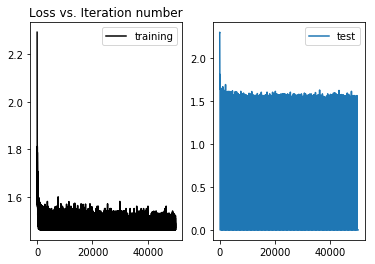

In [6]:
# Evaluating result

print(sess.run(accuracy, feed_dict={X: X_train_reshape, Y: y_train_reshape})[1])


f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(iters, lossdata,'k-', label = "training")
ax1.set_title('Loss vs. Iteration number')
ax1.legend(loc="upper right")
ax2.plot(iters, lossdata2, label="test")
ax2.legend(loc="upper right")
